In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

titanic = titanic.drop(columns=['Name']) # drop the column 'Name'
is_F = (titanic['Sex']=='female') # array of True and False
titanic['Sex'] = is_F.astype(int) # 1 = female, 0 = male
train = titanic.sample(frac=0.8) # 80% rows for training
test = titanic.drop(index=train.index)

y_train = train['Survived']
X_train = train.drop(columns=['Survived'])
print(X_train.shape, y_train.shape)

y_test = test['Survived']
X_test = test.drop(columns=['Survived']) 
print(X_test.shape, y_test.shape)

(710, 6) (710,)
(177, 6) (177,)


In [3]:
from sklearn import tree

T = tree.DecisionTreeClassifier(max_depth=2)

T.fit(X_train, y_train)

print('max_depth 2')
print('Train score:',T.score(X_train, y_train))
print('Test score:',T.score(X_test, y_test))

max_depth 2
Train score: 0.7929577464788733
Test score: 0.7909604519774012


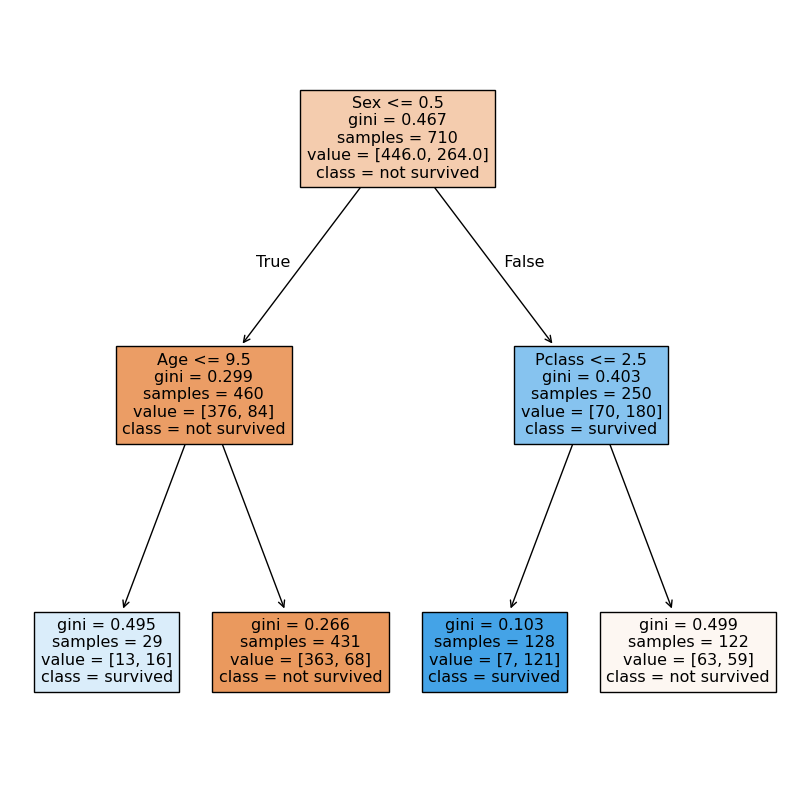

In [4]:
fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree(T, 
                   filled=True, 
                   feature_names=X_train.columns,
                  class_names=['not survived', 'survived'])

## Metrics

In [5]:
y_pred = T.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0]


In [6]:
print(y_test)

4      0
8      1
14     0
16     0
21     1
      ..
867    1
872    0
874    0
875    1
882    0
Name: Survived, Length: 177, dtype: int64


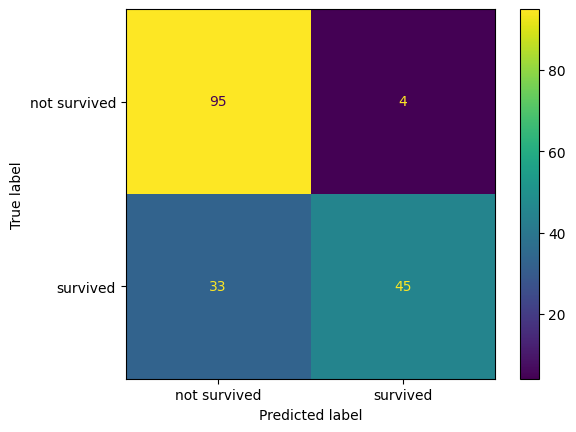

In [7]:
from sklearn import metrics
# https://scikit-learn.org/stable/api/sklearn.metrics.html

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['not survived', 'survived'])

In [8]:
metrics.precision_score(y_test, y_pred)

0.9183673469387755

In [9]:
metrics.recall_score(y_test, y_pred)

0.5769230769230769

In [10]:
metrics.f1_score(y_test, y_pred)

0.7086614173228346

## Remedies

In [11]:
titanic.Survived.value_counts()

Survived
0    545
1    342
Name: count, dtype: int64

In [12]:
not_survived = titanic[titanic.Survived == 0]
print(not_survived.shape)
not_survived.head()

(545, 7)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
4,0,3,0,35.0,0,0,8.0500
5,0,3,0,27.0,0,0,8.4583
6,0,1,0,54.0,0,0,51.8625
7,0,3,0,2.0,3,1,21.0750


In [13]:
survived = titanic[titanic.Survived == 1]
print(survived.shape)
survived.head()

(342, 7)


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
8,1,3,1,27.0,0,2,11.1333
9,1,2,1,14.0,1,0,30.0708


In [14]:
# undersampling the big class
not_survived_sampled = not_survived.sample(n=342)
print(not_survived_sampled.shape)
undersampled = pd.concat((not_survived_sampled, survived))
print(undersampled.shape)

(342, 7)
(684, 7)


In [15]:
# oversampling the small class
survived_sampled = survived.sample(n=545, replace=True)
print(survived_sampled.shape)
oversampled = pd.concat((survived_sampled, not_survived))
print(oversampled.shape)

(545, 7)
(1090, 7)
